<a href="https://colab.research.google.com/github/Melisacid/Act_6.2/blob/main/Actividad_6_2_mexico_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df= pd.read_csv("data_clean_california_eua.csv")
df.head()

,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,0,958.0,2.020000e+13,1169,1.0,1.0,37.77028,-122.43317,3.0,1.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",202.0,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,1,5858.0,2.020000e+13,8904,2.0,2.0,37.74474,-122.42089,4.0,2.0,...,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",235.0,t,06/03/2023,03/05/2009,06/08/2017,City Registration Pending,f
2,2,8142.0,2.020000e+13,21994,13.0,14.0,37.76555,-122.45213,1.0,1.0,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",56.0,t,06/03/2023,08/09/2014,27/10/2022,City Registration Pending,f
3,3,8339.0,2.020000e+13,24215,2.0,6.0,37.77564,-122.43642,4.0,2.0,...,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",575.0,t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
4,4,8739.0,2.020000e+13,7149,2.0,2.0,37.76030,-122.42197,3.0,1.0,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",110.0,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f


In [6]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6936 entries, 0 to 6935
Data columns (total 73 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    6936 non-null   int64  
 1   id                                            6936 non-null   float64
 2   scrape_id                                     6936 non-null   float64
 3   host_id                                       6936 non-null   int64  
 4   host_listings_count                           6936 non-null   float64
 5   host_total_listings_count                     6936 non-null   float64
 6   latitude                                      6936 non-null   float64
 7   longitude                                     6936 non-null   float64
 8   accommodates                                  6936 non-null   float64
 9   bedrooms                                      6936 non-null   f

## Analizar la correlación que existe en cada tipo de habitación (Elegir 2 tipos) respecto a las variables siguientes en el siguiente orden “(dependiente, independiente)”

# **Tipo de habitación 1: Private room.**

## **1.“host_acceptance_rate vs host_response_rate, Price, number_of_reviews , review_scores_rating”**

In [10]:
# Filtrar los datos para obtener solo los tipos de habitación "Entire home/apt" y "Hotel room"
private_room = df[df['room_type'] == 'Private room']

In [ ]:
#Cambiar datos
private_room['host_response_rate'] = private_room['host_response_rate'].astype(str)  
private_room['host_response_rate'] = private_room['host_response_rate'].str.replace('%', '')  
private_room['host_response_rate'] = pd.to_numeric(private_room['host_response_rate'], errors='coerce')  
private_room[['host_acceptance_rate',"host_response_rate"]] = private_room[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

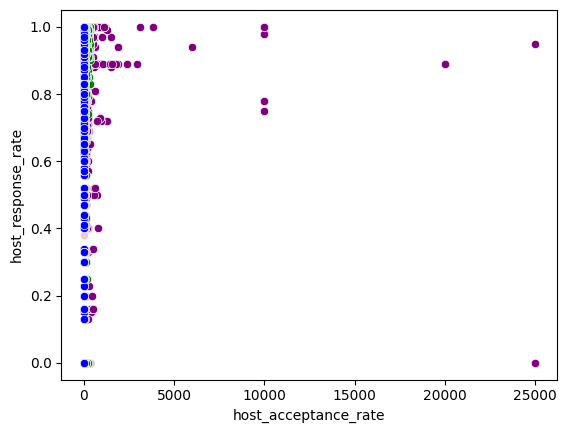

In [12]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate',color="pink",data=private_room)
sns.scatterplot(x='price', y='host_acceptance_rate', color="purple", data=private_room)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="green", data=private_room)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="blue", data=private_room)

In [13]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]]
Var_Dep= private_room['host_acceptance_rate']

In [14]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [15]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [16]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

**Modelo matemático: y= 1.97911016e-01x1 + -2.52257605e-08x2 + 1.78771577e-04x3 + -1.48484267e-02x4 + 90.14555660858437**

In [18]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.05579596065317893

In [19]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]])
y_pred

array([0.90353966, 0.89313111, 0.92451164, ..., 0.88825907, 0.88809708,
       0.8882287 ])

In [20]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones', y_pred)
private_room.head()

,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,0.903540,2,8142.0,2.020000e+13,21994,13.0,14.0,37.76555,-122.45213,1.0,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",56.0,t,06/03/2023,08/09/2014,27/10/2022,City Registration Pending,f
4,0.893131,4,8739.0,2.020000e+13,7149,2.0,2.0,37.76030,-122.42197,3.0,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",110.0,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
6,0.924512,6,490931.0,2.020000e+13,1269188,1.0,3.0,37.74766,-122.42041,2.0,...,Private room,1 bath,"[""Oven"", ""Cooking basics"", ""Blender"", ""Shampoo...",100.0,t,06/03/2023,22/04/2014,26/11/2022,STR-0002192,f
7,0.883448,7,10537.0,2.020000e+13,36752,2.0,3.0,37.71750,-122.39698,2.0,...,Private room,1.5 shared baths,"[""Self check-in"", ""Shared BBQ grill: charcoal""...",95.0,t,06/03/2023,21/02/2010,28/01/2023,2022-011003STR,f
11,0.948622,11,144978.0,2.020000e+13,216682,9.0,9.0,37.79233,-122.42431,1.0,...,Private room,1 bath,"[""Essentials"", ""Bed linens"", ""Carbon monoxide ...",55.0,t,06/03/2023,10/07/2011,28/02/2023,2022-011317STR,f


<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

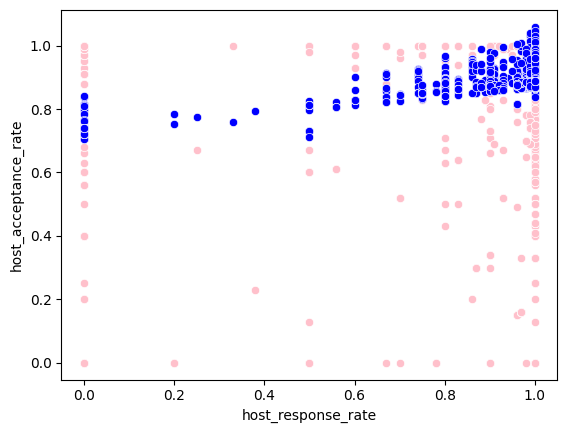

In [21]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="pink", data=private_room)
sns.scatterplot(x='host_response_rate', y='Predicciones', color="blue", data=private_room)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

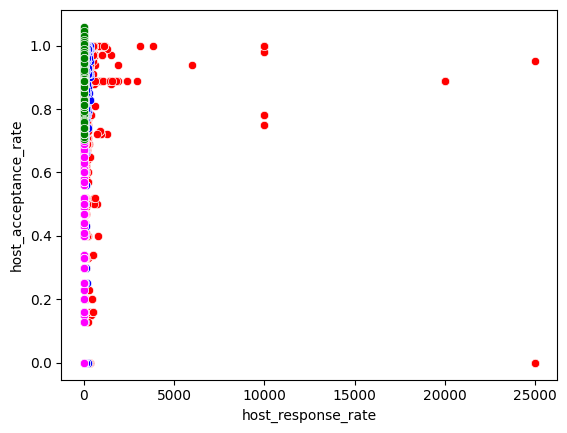

In [22]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="pink", data=private_room)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=private_room)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=private_room)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="magenta", data=private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="green", data=private_room)

In [23]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.05579596065317893
Coeficiente de correlación:  0.2362116861062952


## **2.“Price” vs availability_365, host_response_rate, number_of_reviews, accommodates“**

<Axes: xlabel='availability_365', ylabel='price'>

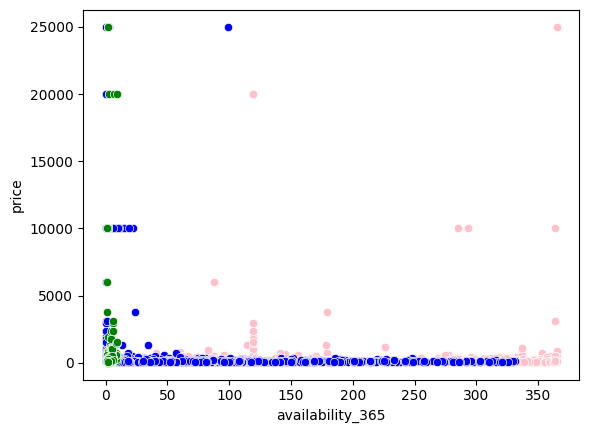

In [24]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='availability_365', y='price', color="pink", data=private_room)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=private_room)
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=private_room)
sns.scatterplot(x='accommodates', y='price', color="green", data=private_room)

In [25]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]]
Var_Dep= private_room['price']

In [26]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [27]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [28]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [29]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 7.56674669e-02, -8.13242464e+02, -2.21752152e+00,  2.57873754e+02]),
 'rank_': 4,
 'singular_': array([6573.11627745, 3220.68425465,   57.05960486,    9.33999862]),
 'intercept_': 699.3555588701715}

**Modelo matemático: y= -1.44748703x1 + 568.22965627x2+ -13.41899636x3 + 32.5337422x4 + 1456.3609884316134**

In [30]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.034759524779279904

In [31]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]])
y_pred

array([151.64778065, 591.49120586, 249.50481295, ..., 169.63812024,
       171.52980691, 415.40507996])

In [32]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones2', y_pred)
private_room.head()

,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,151.647781,0.903540,2,8142.0,2.020000e+13,21994,13.0,14.0,37.76555,-122.45213,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",56.0,t,06/03/2023,08/09/2014,27/10/2022,City Registration Pending,f
4,591.491206,0.893131,4,8739.0,2.020000e+13,7149,2.0,2.0,37.76030,-122.42197,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",110.0,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
6,249.504813,0.924512,6,490931.0,2.020000e+13,1269188,1.0,3.0,37.74766,-122.42041,...,Private room,1 bath,"[""Oven"", ""Cooking basics"", ""Blender"", ""Shampoo...",100.0,t,06/03/2023,22/04/2014,26/11/2022,STR-0002192,f
7,387.346320,0.883448,7,10537.0,2.020000e+13,36752,2.0,3.0,37.71750,-122.39698,...,Private room,1.5 shared baths,"[""Self check-in"", ""Shared BBQ grill: charcoal""...",95.0,t,06/03/2023,21/02/2010,28/01/2023,2022-011003STR,f
11,-120.171545,0.948622,11,144978.0,2.020000e+13,216682,9.0,9.0,37.79233,-122.42431,...,Private room,1 bath,"[""Essentials"", ""Bed linens"", ""Carbon monoxide ...",55.0,t,06/03/2023,10/07/2011,28/02/2023,2022-011317STR,f


<Axes: xlabel='availability_365', ylabel='price'>

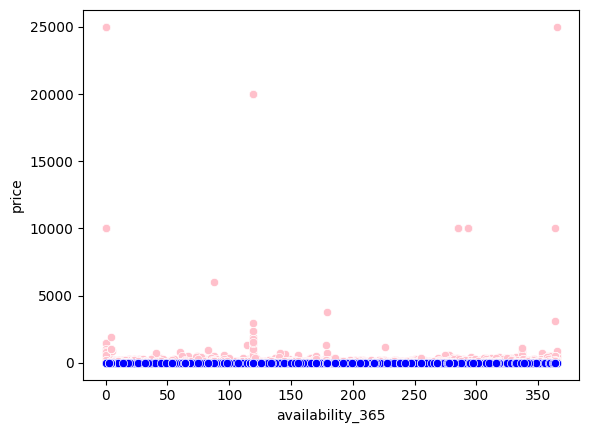

In [33]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='availability_365', y='price', color="pink", data=private_room)
sns.scatterplot(x='availability_365', y='Predicciones', color="blue", data=private_room)

<Axes: xlabel='availability_365', ylabel='price'>

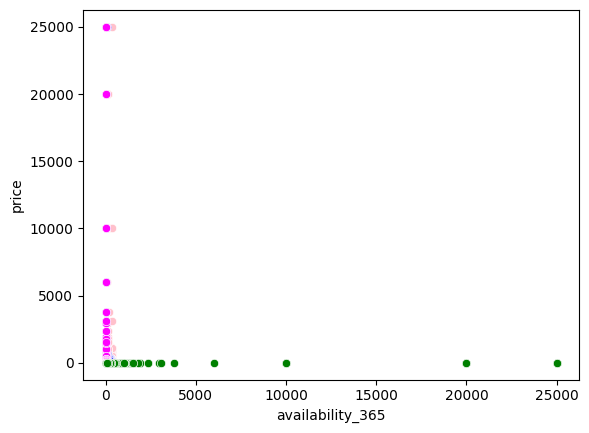

In [34]:
sns.scatterplot(x='availability_365', y='price', color="pink", data=private_room)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=private_room)
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=private_room)
sns.scatterplot(x='accommodates', y='price', color="magenta", data=private_room)
sns.scatterplot(x='price', y='Predicciones', color="green", data=private_room)

In [35]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.034759524779279904
Coeficiente de correlación:  0.186439064520502


## **3. “host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication ”**

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

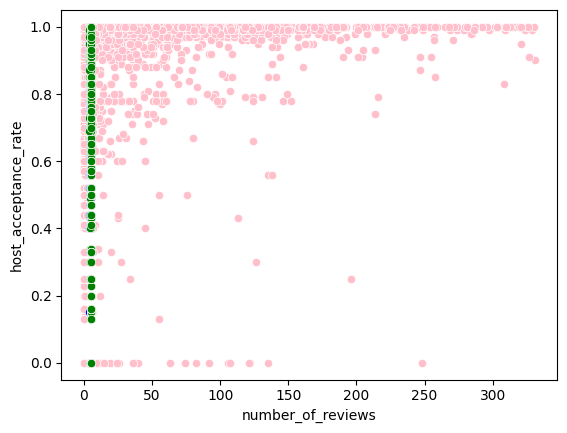

In [36]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=private_room)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="blue", data=private_room)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="green", data=private_room)

In [37]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= private_room[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= private_room['host_acceptance_rate']

In [38]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [39]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [40]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [41]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.00047819, -0.02180759, -0.08880966]),
 'rank_': 3,
 'singular_': array([3228.87536234,   12.90821114,    7.58020338]),
 'intercept_': 1.4141510617524828}

**Modelo matemático: y= 0.0002161x1 + -0.00433818x2 + -0.00180715x3 + 0.9933496363257538**

In [42]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.03345036946810964

In [43]:
#Predecimos los valores de total 
y_pred= model.predict(X=private_room[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']])
y_pred

array([0.89711889, 0.88323615, 0.92431009, ..., 0.87430728, 0.87430728,
       0.87430728])

In [44]:
#Insertamos la columna de predicciones en el DataFrame
private_room.insert(0, 'Predicciones3', y_pred)
private_room.head()

,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
2,0.897119,151.647781,0.903540,2,8142.0,2.020000e+13,21994,13.0,14.0,37.76555,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",56.0,t,06/03/2023,08/09/2014,27/10/2022,City Registration Pending,f
4,0.883236,591.491206,0.893131,4,8739.0,2.020000e+13,7149,2.0,2.0,37.76030,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",110.0,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f
6,0.924310,249.504813,0.924512,6,490931.0,2.020000e+13,1269188,1.0,3.0,37.74766,...,Private room,1 bath,"[""Oven"", ""Cooking basics"", ""Blender"", ""Shampoo...",100.0,t,06/03/2023,22/04/2014,26/11/2022,STR-0002192,f
7,0.870150,387.346320,0.883448,7,10537.0,2.020000e+13,36752,2.0,3.0,37.71750,...,Private room,1.5 shared baths,"[""Self check-in"", ""Shared BBQ grill: charcoal""...",95.0,t,06/03/2023,21/02/2010,28/01/2023,2022-011003STR,f
11,0.947794,-120.171545,0.948622,11,144978.0,2.020000e+13,216682,9.0,9.0,37.79233,...,Private room,1 bath,"[""Essentials"", ""Bed linens"", ""Carbon monoxide ...",55.0,t,06/03/2023,10/07/2011,28/02/2023,2022-011317STR,f


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

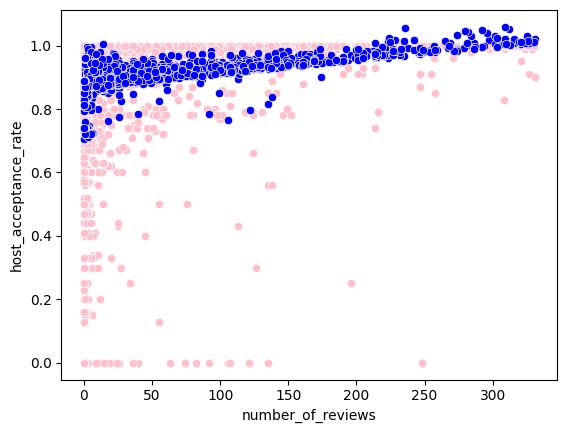

In [45]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=private_room)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="blue", data=private_room)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

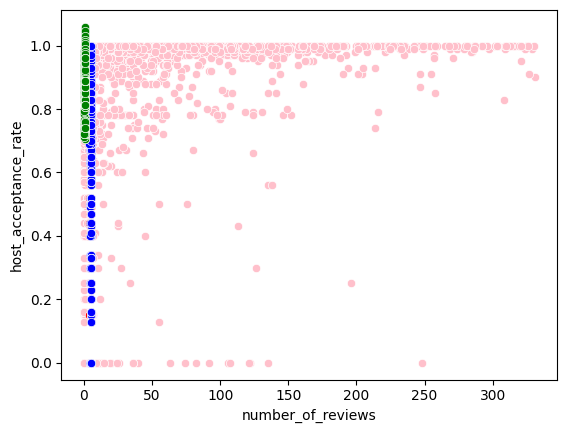

In [46]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=private_room)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=private_room)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="blue", data=private_room)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="green", data=private_room)

In [47]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.03345036946810964
Coeficiente de correlación:  0.18289442164295128


# **Tipo de habitación 2: Entire home/apt.**

In [48]:
df= pd.read_csv("data_clean_california_eua.csv")
df.head()

,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,0,958.0,2.020000e+13,1169,1.0,1.0,37.77028,-122.43317,3.0,1.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",202.0,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,1,5858.0,2.020000e+13,8904,2.0,2.0,37.74474,-122.42089,4.0,2.0,...,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",235.0,t,06/03/2023,03/05/2009,06/08/2017,City Registration Pending,f
2,2,8142.0,2.020000e+13,21994,13.0,14.0,37.76555,-122.45213,1.0,1.0,...,Private room,4 shared baths,"[""Security cameras on property"", ""Host greets ...",56.0,t,06/03/2023,08/09/2014,27/10/2022,City Registration Pending,f
3,3,8339.0,2.020000e+13,24215,2.0,6.0,37.77564,-122.43642,4.0,2.0,...,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",575.0,t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
4,4,8739.0,2.020000e+13,7149,2.0,2.0,37.76030,-122.42197,3.0,1.0,...,Private room,1 private bath,"[""Paid parking garage off premises"", ""Luggage ...",110.0,t,06/03/2023,01/08/2009,25/02/2023,STR-0000028,f


In [49]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

0

In [50]:
#No se porque sale que hay nulos si en el archivo del pais dice que hay 0 nulos
#para que no haya errores todos los nulos los reemplazo con bfill
df.fillna(method='bfill', inplace=True)

In [51]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=df.isnull().sum().sum()
valores_nulos

0

# **1.host_acceptance_rate vs host_response_rate**

In [52]:
enthome_apt = df[df['room_type'] == 'Entire home/apt']

In [ ]:
#Cambiar datos
enthome_apt['host_response_rate'] = enthome_apt['host_response_rate'].astype(str)  
enthome_apt['host_response_rate'] = enthome_apt['host_response_rate'].str.replace('%', '')  
enthome_apt['host_response_rate'] = pd.to_numeric(enthome_apt['host_response_rate'], errors='coerce')
enthome_apt[['host_acceptance_rate',"host_response_rate"]] = enthome_apt[['host_acceptance_rate',"host_response_rate"]].replace('%', '', regex=True).astype('float') / 100

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

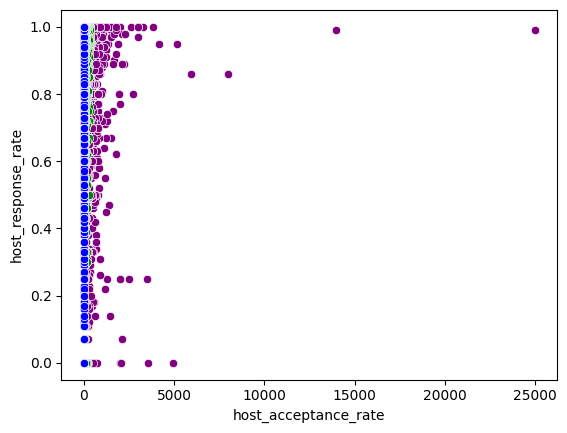

In [54]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate',color="pink",data=enthome_apt)
sns.scatterplot(x='price', y='host_acceptance_rate', color="purple", data=enthome_apt)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="green", data=enthome_apt)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="blue", data=enthome_apt)

In [55]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]]
Var_Dep= enthome_apt['host_acceptance_rate']

In [56]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [57]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [58]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [59]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate', 'price', 'number_of_reviews',
        'review_scores_rating'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 3.32022133e-01, -8.47082981e-06,  4.29251651e-04,  2.13646295e-03]),
 'rank_': 4,
 'singular_': array([3.54404615e+04, 3.89365299e+03, 1.49387290e+01, 8.40615217e+00]),
 'intercept_': 0.5264037048019014}

**Modelo matemático: y= 4.17197584e-01x1 + -1.00834090e-08x2 + 1.23100925e-04x3 + -4.88579925e-03x4 + 0.5839431273540848**

In [60]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.05786424048195149

In [61]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['host_response_rate', 'price','number_of_reviews',"review_scores_rating"]])
y_pred

array([0.88265821, 0.84810364, 0.87597873, ..., 0.86729164, 0.86760606,
       0.8655043 ])

In [62]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones', y_pred)
enthome_apt.head()

,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,0.882658,0,958.0,2.020000e+13,1169,1.0,1.0,37.77028,-122.43317,3.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",202.0,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,0.848104,1,5858.0,2.020000e+13,8904,2.0,2.0,37.74474,-122.42089,4.0,...,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",235.0,t,06/03/2023,03/05/2009,06/08/2017,City Registration Pending,f
3,0.875979,3,8339.0,2.020000e+13,24215,2.0,6.0,37.77564,-122.43642,4.0,...,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",575.0,t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
5,0.967167,5,142177.0,2.020000e+13,656263,1.0,2.0,37.78440,-122.47932,4.0,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",259.0,t,06/03/2023,21/10/2011,17/02/2023,STR-0002192,f
8,0.889226,8,491867.0,2.020000e+13,969518,2.0,3.0,37.77196,-122.43477,5.0,...,Entire home/apt,2 baths,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",425.0,t,06/03/2023,14/08/2012,19/02/2023,STR-0000192,f


<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

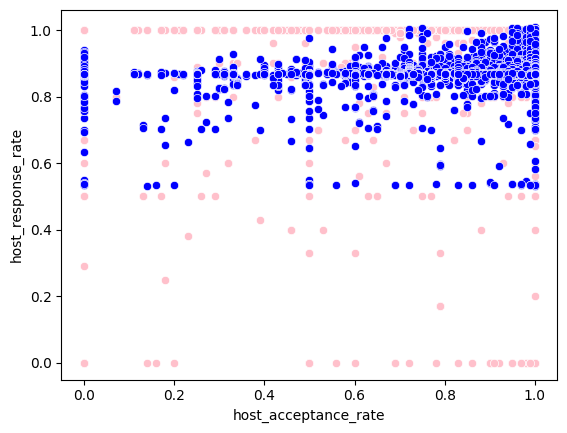

In [63]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="blue", data=enthome_apt)

<Axes: xlabel='host_response_rate', ylabel='host_acceptance_rate'>

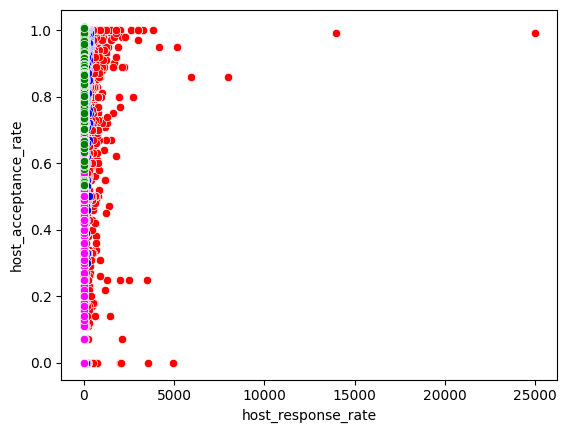

In [64]:
sns.scatterplot(x='host_response_rate', y='host_acceptance_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='price', y='host_acceptance_rate', color="red", data=enthome_apt)
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="blue", data=enthome_apt)
sns.scatterplot(x='review_scores_rating', y='host_acceptance_rate', color="magenta", data=enthome_apt)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="green", data=enthome_apt)

In [65]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.05786424048195149
Coeficiente de correlación:  0.24054987109111384


## **2.“Price” vs availability_365, host_response_rate, number_of_reviews, accommodates“**

<Axes: xlabel='availability_365', ylabel='price'>

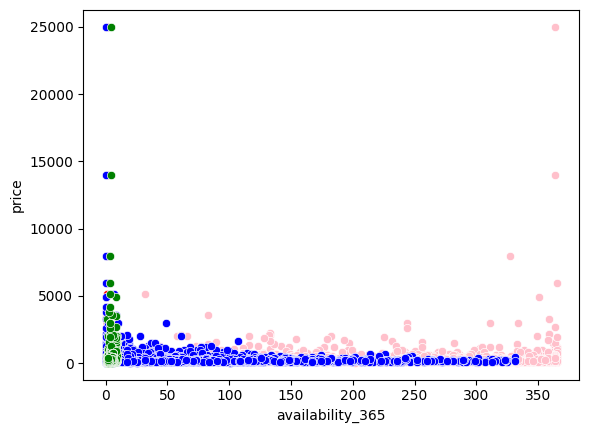

In [66]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='availability_365', y='price', color="pink", data=enthome_apt)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=enthome_apt)
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=enthome_apt)
sns.scatterplot(x='accommodates', y='price', color="green", data=enthome_apt)

In [67]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]]
Var_Dep= enthome_apt['price']

In [68]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [69]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [70]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [71]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['availability_365', 'host_response_rate', 'number_of_reviews',
        'accommodates'], dtype=object),
 'n_features_in_': 4,
 'coef_': array([ 0.11847771, 70.64730884, -0.34890555, 61.56812558]),
 'rank_': 4,
 'singular_': array([8350.63968619, 3868.50087874,  113.81927759,    8.38959404]),
 'intercept_': -28.054680598457935}

**Modelo matemático: y= 5.91040103e-01x1 + -1.00963732e+04x2+ 6.63729846e-01x3 + 2.15436449e+02x4 + 11194.520163669176**

In [72]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.041304627080502976

In [73]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['availability_365', 'host_response_rate','number_of_reviews',"accommodates"]])
y_pred

array([229.83177075, 279.25151632, 322.34013857, ..., 172.48210875,
       207.55803783, 208.85476505])

In [74]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones2', y_pred)
enthome_apt.head()

,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,229.831771,0.882658,0,958.0,2.020000e+13,1169,1.0,1.0,37.77028,-122.43317,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",202.0,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,279.251516,0.848104,1,5858.0,2.020000e+13,8904,2.0,2.0,37.74474,-122.42089,...,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",235.0,t,06/03/2023,03/05/2009,06/08/2017,City Registration Pending,f
3,322.340139,0.875979,3,8339.0,2.020000e+13,24215,2.0,6.0,37.77564,-122.43642,...,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",575.0,t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
5,211.012519,0.967167,5,142177.0,2.020000e+13,656263,1.0,2.0,37.78440,-122.47932,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",259.0,t,06/03/2023,21/10/2011,17/02/2023,STR-0002192,f
8,331.723889,0.889226,8,491867.0,2.020000e+13,969518,2.0,3.0,37.77196,-122.43477,...,Entire home/apt,2 baths,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",425.0,t,06/03/2023,14/08/2012,19/02/2023,STR-0000192,f


<Axes: xlabel='availability_365', ylabel='price'>

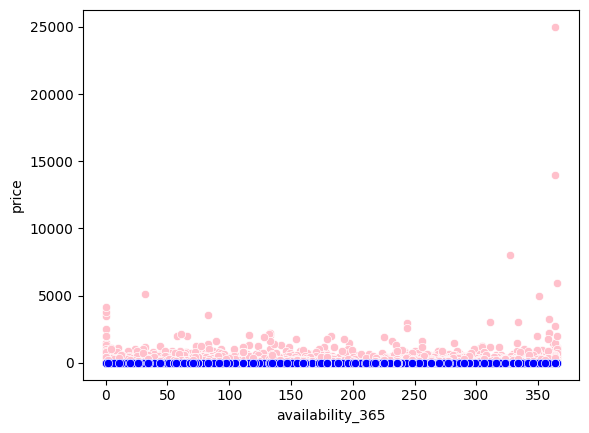

In [75]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='availability_365', y='price', color="pink", data=enthome_apt)
sns.scatterplot(x='availability_365', y='Predicciones', color="blue", data=enthome_apt)

<Axes: xlabel='availability_365', ylabel='price'>

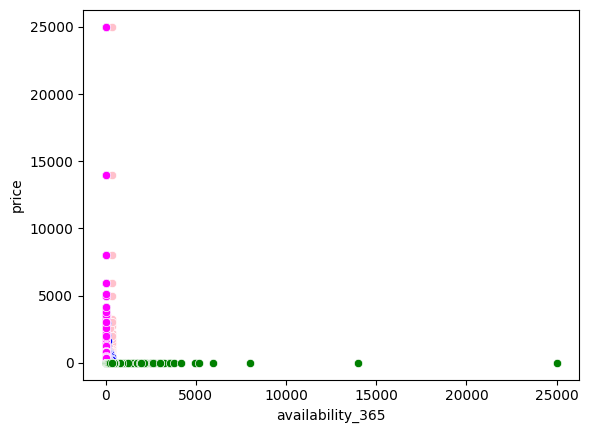

In [76]:
sns.scatterplot(x='availability_365', y='price', color="pink", data=enthome_apt)
sns.scatterplot(x='host_response_rate', y='price', color="red", data=enthome_apt)
sns.scatterplot(x='number_of_reviews', y='price', color="blue", data=enthome_apt)
sns.scatterplot(x='accommodates', y='price', color="magenta", data=enthome_apt)
sns.scatterplot(x='price', y='Predicciones', color="green", data=enthome_apt)

In [77]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.041304627080502976
Coeficiente de correlación:  0.2032353981975162


## **3. “host_acceptance_rate vs number_of_reviews,review_scores_cleanliness,review_scores_communication ”**

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

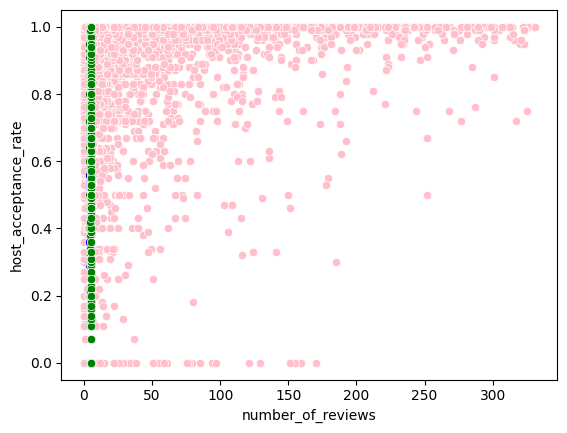

In [78]:
#Imprimimos el scatter plot entre la variable dependiente e independiente
#para observar el comportamiento en su dispersión 
from turtle import color

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="blue", data=enthome_apt)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="green", data=enthome_apt)

In [79]:
#Declaramos las variables dependientes e independientes para la regresión lineal

Vars_Indep= enthome_apt[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']]
Var_Dep= enthome_apt['host_acceptance_rate']

In [80]:
#Se define model como la función de regresión lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [81]:
#Verificamos la función relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [82]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)

LinearRegression()

In [83]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['number_of_reviews', 'review_scores_cleanliness',
        'review_scores_communication'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([ 0.0004716 , -0.00331317,  0.03454188]),
 'rank_': 3,
 'singular_': array([3896.92919229,   15.15890981,    9.56153317]),
 'intercept_': 0.7010662020625897}

**Modelo matemático: y= 0.0001707x1 + 0.00886669x2 + -0.00298158x3 + 0.9435067016176633**

In [84]:
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
model.score(Vars_Indep,Var_Dep)

0.018372665191307203

In [85]:
#Predecimos los valores de total 
y_pred= model.predict(X=enthome_apt[['number_of_reviews', 'review_scores_cleanliness','review_scores_communication']])
y_pred

array([0.87040178, 0.90480696, 0.87041462, ..., 0.85441822, 0.85768138,
       0.85441822])

In [86]:
#Insertamos la columna de predicciones en el DataFrame
enthome_apt.insert(0, 'Predicciones3', y_pred)
enthome_apt.head()

,Predicciones3,Predicciones2,Predicciones,Unnamed: 0,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,...,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,license,instant_bookable
0,0.870402,229.831771,0.882658,0,958.0,2.020000e+13,1169,1.0,1.0,37.77028,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",202.0,t,06/03/2023,23/07/2009,19/02/2023,City Registration Pending,f
1,0.904807,279.251516,0.848104,1,5858.0,2.020000e+13,8904,2.0,2.0,37.74474,...,Entire home/apt,1 bath,"[""Essentials"", ""Carbon monoxide alarm"", ""Hange...",235.0,t,06/03/2023,03/05/2009,06/08/2017,City Registration Pending,f
3,0.870415,322.340139,0.875979,3,8339.0,2.020000e+13,24215,2.0,6.0,37.77564,...,Entire home/apt,1.5 baths,"[""Oven"", ""Cooking basics"", ""TV"", ""Smoke alarm""...",575.0,t,06/03/2023,25/09/2009,28/06/2019,STR-0000264,f
5,0.966926,211.012519,0.967167,5,142177.0,2.020000e+13,656263,1.0,2.0,37.78440,...,Entire home/apt,1 bath,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",259.0,t,06/03/2023,21/10/2011,17/02/2023,STR-0002192,f
8,0.880975,331.723889,0.889226,8,491867.0,2.020000e+13,969518,2.0,3.0,37.77196,...,Entire home/apt,2 baths,"[""Oven"", ""Self check-in"", ""Cooking basics"", ""L...",425.0,t,06/03/2023,14/08/2012,19/02/2023,STR-0000192,f


<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

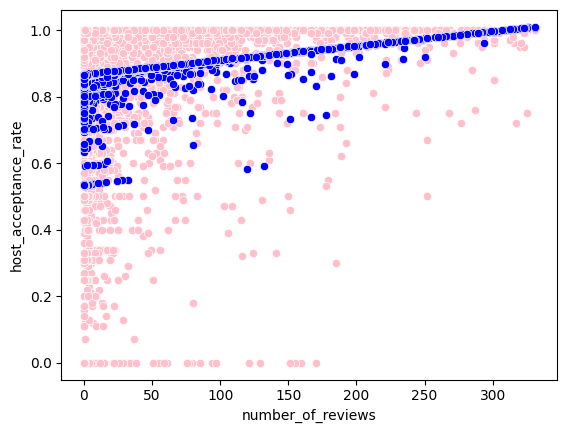

In [87]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido

sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='number_of_reviews', y='Predicciones', color="blue", data=enthome_apt)

<Axes: xlabel='number_of_reviews', ylabel='host_acceptance_rate'>

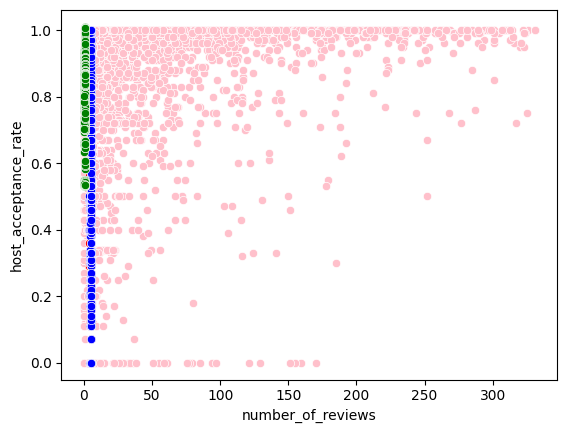

In [88]:
sns.scatterplot(x='number_of_reviews', y='host_acceptance_rate', color="pink", data=enthome_apt)
sns.scatterplot(x='review_scores_cleanliness', y='host_acceptance_rate', color="red", data=enthome_apt)
sns.scatterplot(x='review_scores_communication', y='host_acceptance_rate', color="blue", data=enthome_apt)
sns.scatterplot(x='host_acceptance_rate', y='Predicciones', color="green", data=enthome_apt)

In [89]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
print("Coeficiente de determinacion: ",coef_Deter)
print("Coeficiente de correlación: ", coef_Correl)

Coeficiente de determinacion:  0.018372665191307203
Coeficiente de correlación:  0.13554580477206662
